## Testing

In [24]:
import pickle
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.neighbors import NearestNeighbors

In [8]:
feature_list = np.array(pickle.load(open('resnet50_features.pkl', 'rb')))
feature_list.shape

(44441, 2048)

In [9]:
image_paths = np.array(pickle.load(open('resnet50_images.pkl', 'rb')))
image_paths.shape

(44441,)

In [15]:
# load the pre-trained ResNet50 model
model = ResNet50(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
model.trainable = False
# model.summary()

model = tf.keras.Sequential([model, GlobalMaxPooling2D()])
model.build(input_shape=(None, 224, 224, 3))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [16]:
# load resnet50 model
# model = tf.keras.models.load_model("resnet50.keras")

In [17]:
# model.summary()

In [23]:
neighbors = NearestNeighbors(n_neighbors=5, algorithm="kd_tree", metric="euclidean")
neighbors.fit(feature_list)

NearestNeighbors(algorithm='kd_tree', metric='euclidean')

In [34]:
image_path = "./sample/image5.jpg"

In [35]:
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
res = model.predict(preprocessed_img).flatten()
normalized_res = res / norm(res)  # L2 Normalization

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


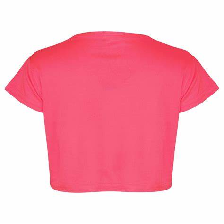

In [38]:
img

In [39]:
normalized_res.shape

(2048,)

In [40]:
distances, indexes = neighbors.kneighbors([normalized_res])

In [41]:
print(distances)

[[0.56242427 0.56304721 0.56671622 0.57186073 0.5731036 ]]


In [42]:
print(indexes)

[[17480 44064 14910 41463 28196]]


In [43]:
output_images = image_paths[indexes].flatten()

# convert ndarray to normal array
output_images = output_images.tolist()

# extract the numeral part of the path
output_images = [int(x.split("\\")[-1].split(".")[0]) for x in output_images]

output_images

[30618, 9552, 27443, 6538, 44222]

In [44]:
# modify the path to the image
output_images = [f"./data/images/{x}.jpg" for x in output_images]

In [45]:
# convert to numpy array
output_images = np.array(output_images)

output_images

array(['./data/images/30618.jpg', './data/images/9552.jpg',
       './data/images/27443.jpg', './data/images/6538.jpg',
       './data/images/44222.jpg'], dtype='<U23')

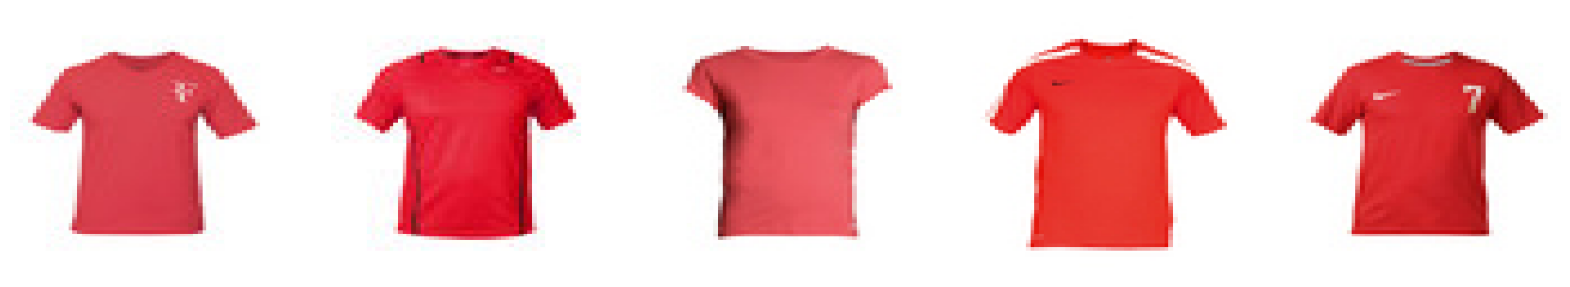

In [46]:
# plot all the images in output_images in a grid
plt.figure(figsize=(20, 20))
for i in range(len(output_images)):
    plt.subplot(1, 5, i+1)
    img = image.load_img(output_images[i], target_size=(224, 224))
    plt.imshow(img)
    plt.axis("off")
plt.show()